In [71]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data)
subset = data[[0, 1]]
subset = subset.drop(subset.index[list(range(100,150))])
subset["target"] = iris.target[0:100]
subset.columns = ["sepal length", "sepal width", "target"]
subset["bias"] = 1.0
subset

,sepal length,sepal width,target,bias
0,5.1,3.5,0,1.0
1,4.9,3.0,0,1.0
2,4.7,3.2,0,1.0
3,4.6,3.1,0,1.0
4,5.0,3.6,0,1.0
5,5.4,3.9,0,1.0
6,4.6,3.4,0,1.0
7,5.0,3.4,0,1.0
8,4.4,2.9,0,1.0
9,4.9,3.1,0,1.0


In [74]:
xvals = subset[["bias","sepal length", "sepal width"]].values
# X = xvals.tolist()
yvals = subset[["target"]].values
Y = yvals.tolist()
target = []
for i in Y:
    for j in i:
        target.append(j)

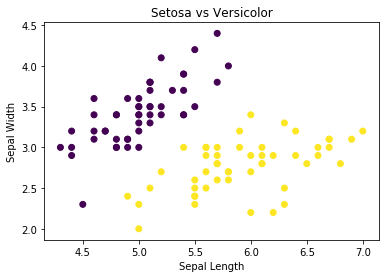

In [76]:
plt.scatter(subset["sepal length"], subset["sepal width"], c = subset["target"])
plt.title("Setosa vs Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [77]:
def perceptron(train,target,threshold,lrate,epochs):
    w = np.random.uniform(size = len(train[0]))
    n = 0
    ŷ = np.ones(len(target))
    e = np.ones(len(target))
    loss = []
    
    while n < epochs:
        for i in range(0, len(train)):
            prod = np.dot(train[i], w)
            if prod > threshold:
                pred = 1.0
            else:
                pred = 0.0
            ŷ[i] = pred
            
            # update rule
            for j in range(0, len(w)):
                w[j] = w[j] + lrate*(target[i]-pred)*train[i][j]
                
            n += 1
        # calculating error    
        for i in range(0, len(target)):
            e[i] = (target[i]-ŷ[i])**2
        loss.append(.5*np.sum(e))
    return w, loss

In [102]:
threshold = 0
lrate = .3
epochs = 100000
perceptron(xvals, target, threshold, lrate, epochs)

(array([-36.59099473,  23.41137373, -29.90083299]),
 [1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1

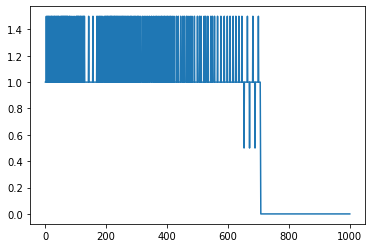

In [104]:
converge = perceptron(xvals, target, threshold, lrate, epochs)[1]
xrange = np.linspace(1,len(converge), len(converge))

plt.plot(xrange, converge)